In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
pd.options.mode.chained_assignment = None

#1 Загрузка датасета
data=pd.read_csv("healthcare-dataset-stroke-data.csv", delimiter=',', encoding='UTF-8')
data_copy = data.copy()



'''
1) id: уникальный идентификатор
2) пол: "Мужчина", "Женщина" или "Другой"
3) возраст: возраст пациента
4) артериальная гипертензия: 0, если у пациента нет артериальной гипертензии, 1, если у пациента есть артериальная гипертензия
5) сердечная недостаточность: 0, если у пациента нет сердечных заболеваний, 1, если у пациента есть сердечные заболевания
6) никогда не состоял в браке: "Нет" или "Да"
7) тип работы: "детская", "Государственная", "Никогда не работавшая", "Частная" или "Самозанятая"
8) Тип проживания: "Сельская" или "Городская"
9) средний уровень глюкозы в крови
10) имт: индекс массы тела
11) статус курильщика: "ранее курил", "никогда не курил", "курит" или "Неизвестно".*
12) инсульт: 1, если у пациента был инсульт, или 0, если нет
'''

data



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#2.Анализ данных
#размер датасета
data.shape

(5110, 12)

In [4]:
#количество ненулевых значений в каждом столбце, тип данных в столбце
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#количество нулевых значений
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [6]:
#основная статистическая информация
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#категориальные переменные
print('work_type',data['work_type'].unique())
print('Residence_type',data['Residence_type'].unique())
print('smoking_status',data['smoking_status'].unique())
print('ever_married',data['ever_married'].unique())
print('gender',data['gender'].unique())


work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
ever_married ['Yes' 'No']
gender ['Male' 'Female' 'Other']


In [8]:
#подготовка датасета

#удаляем столбец с id (ненужные данные)
data = data.drop('id', axis = 1)

#заменяем категориальные данные количественными
'''data['gender'].replace(['man', 'woman', 'other'], [1, 0, 0], inplace=True)
data['ever_married'].replace(['Yes', 'No'], [1, 0], inplace=True)
data['Residence_type'].replace(['Urban', 'Rural'], [1, 0], inplace=True)'''

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
label_encoder = LabelEncoder()
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['gender'] = label_encoder.fit_transform(data['gender'])

print('work_type',data['work_type'].unique())
print('Residence_type',data['Residence_type'].unique())
print('smoking_status',data['smoking_status'].unique())
print('ever_married',data['ever_married'].unique())
print('gender',data['gender'].unique())



work_type [2 3 0 4 1]
Residence_type [1 0]
smoking_status [1 2 3 0]
ever_married [1 0]
gender [1 0 2]


In [9]:
#В столбце bmi 201 нулевое значение, обработаем их

#KNN imputation - это метод, используемый для заполнения пропущенных значений в наборе данных с использованием алгоритма K-ближайших соседей.
#https://www.geeksforgeeks.org/handling-missing-data-with-knn-imputer/

knn_imputer = KNNImputer(n_neighbors= 3)
data['bmi'] = knn_imputer.fit_transform(data[['bmi']])
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [10]:
data['stroke'].value_counts()

,count
stroke,
0,4861
1,249


<Axes: xlabel='stroke'>

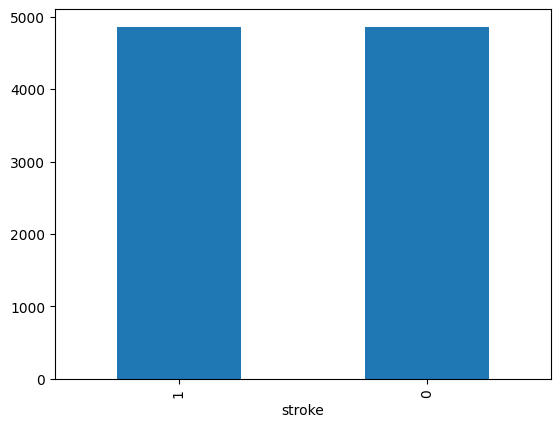

In [11]:
#Видим, что значений класса 1 намного меньше чем значений класса 2,  модель, обученная таким образом, может оказаться малоэффективной.
#https://habr.com/ru/companies/otus/articles/782668/
#https://nuancesprog.ru/p/15938/?ysclid=m154zb6460761086893
#SMOTE (Synthetic Minority Over-sampling Technique) — это алгоритм предварительной обработки данных, используемый для устранения дисбаланса классов в наборе данных.
#Со SMOTE, мы предлагаем подход с передискретизацией, при котором класс меньшинства подвергается передискретизации путем создания «синтетических» примеров, а не путем передискретизации с заменой.

#Ибавляемся от дисбаланса класса stroke
smote = SMOTE(random_state = 42)
x_resampled, y_resampled = smote.fit_resample(data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status' ]], data['stroke'])
data_balanced = pd.DataFrame(x_resampled, columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])
data_balanced['stroke'] = y_resampled

data_balanced['stroke'].value_counts().plot(kind = 'bar')


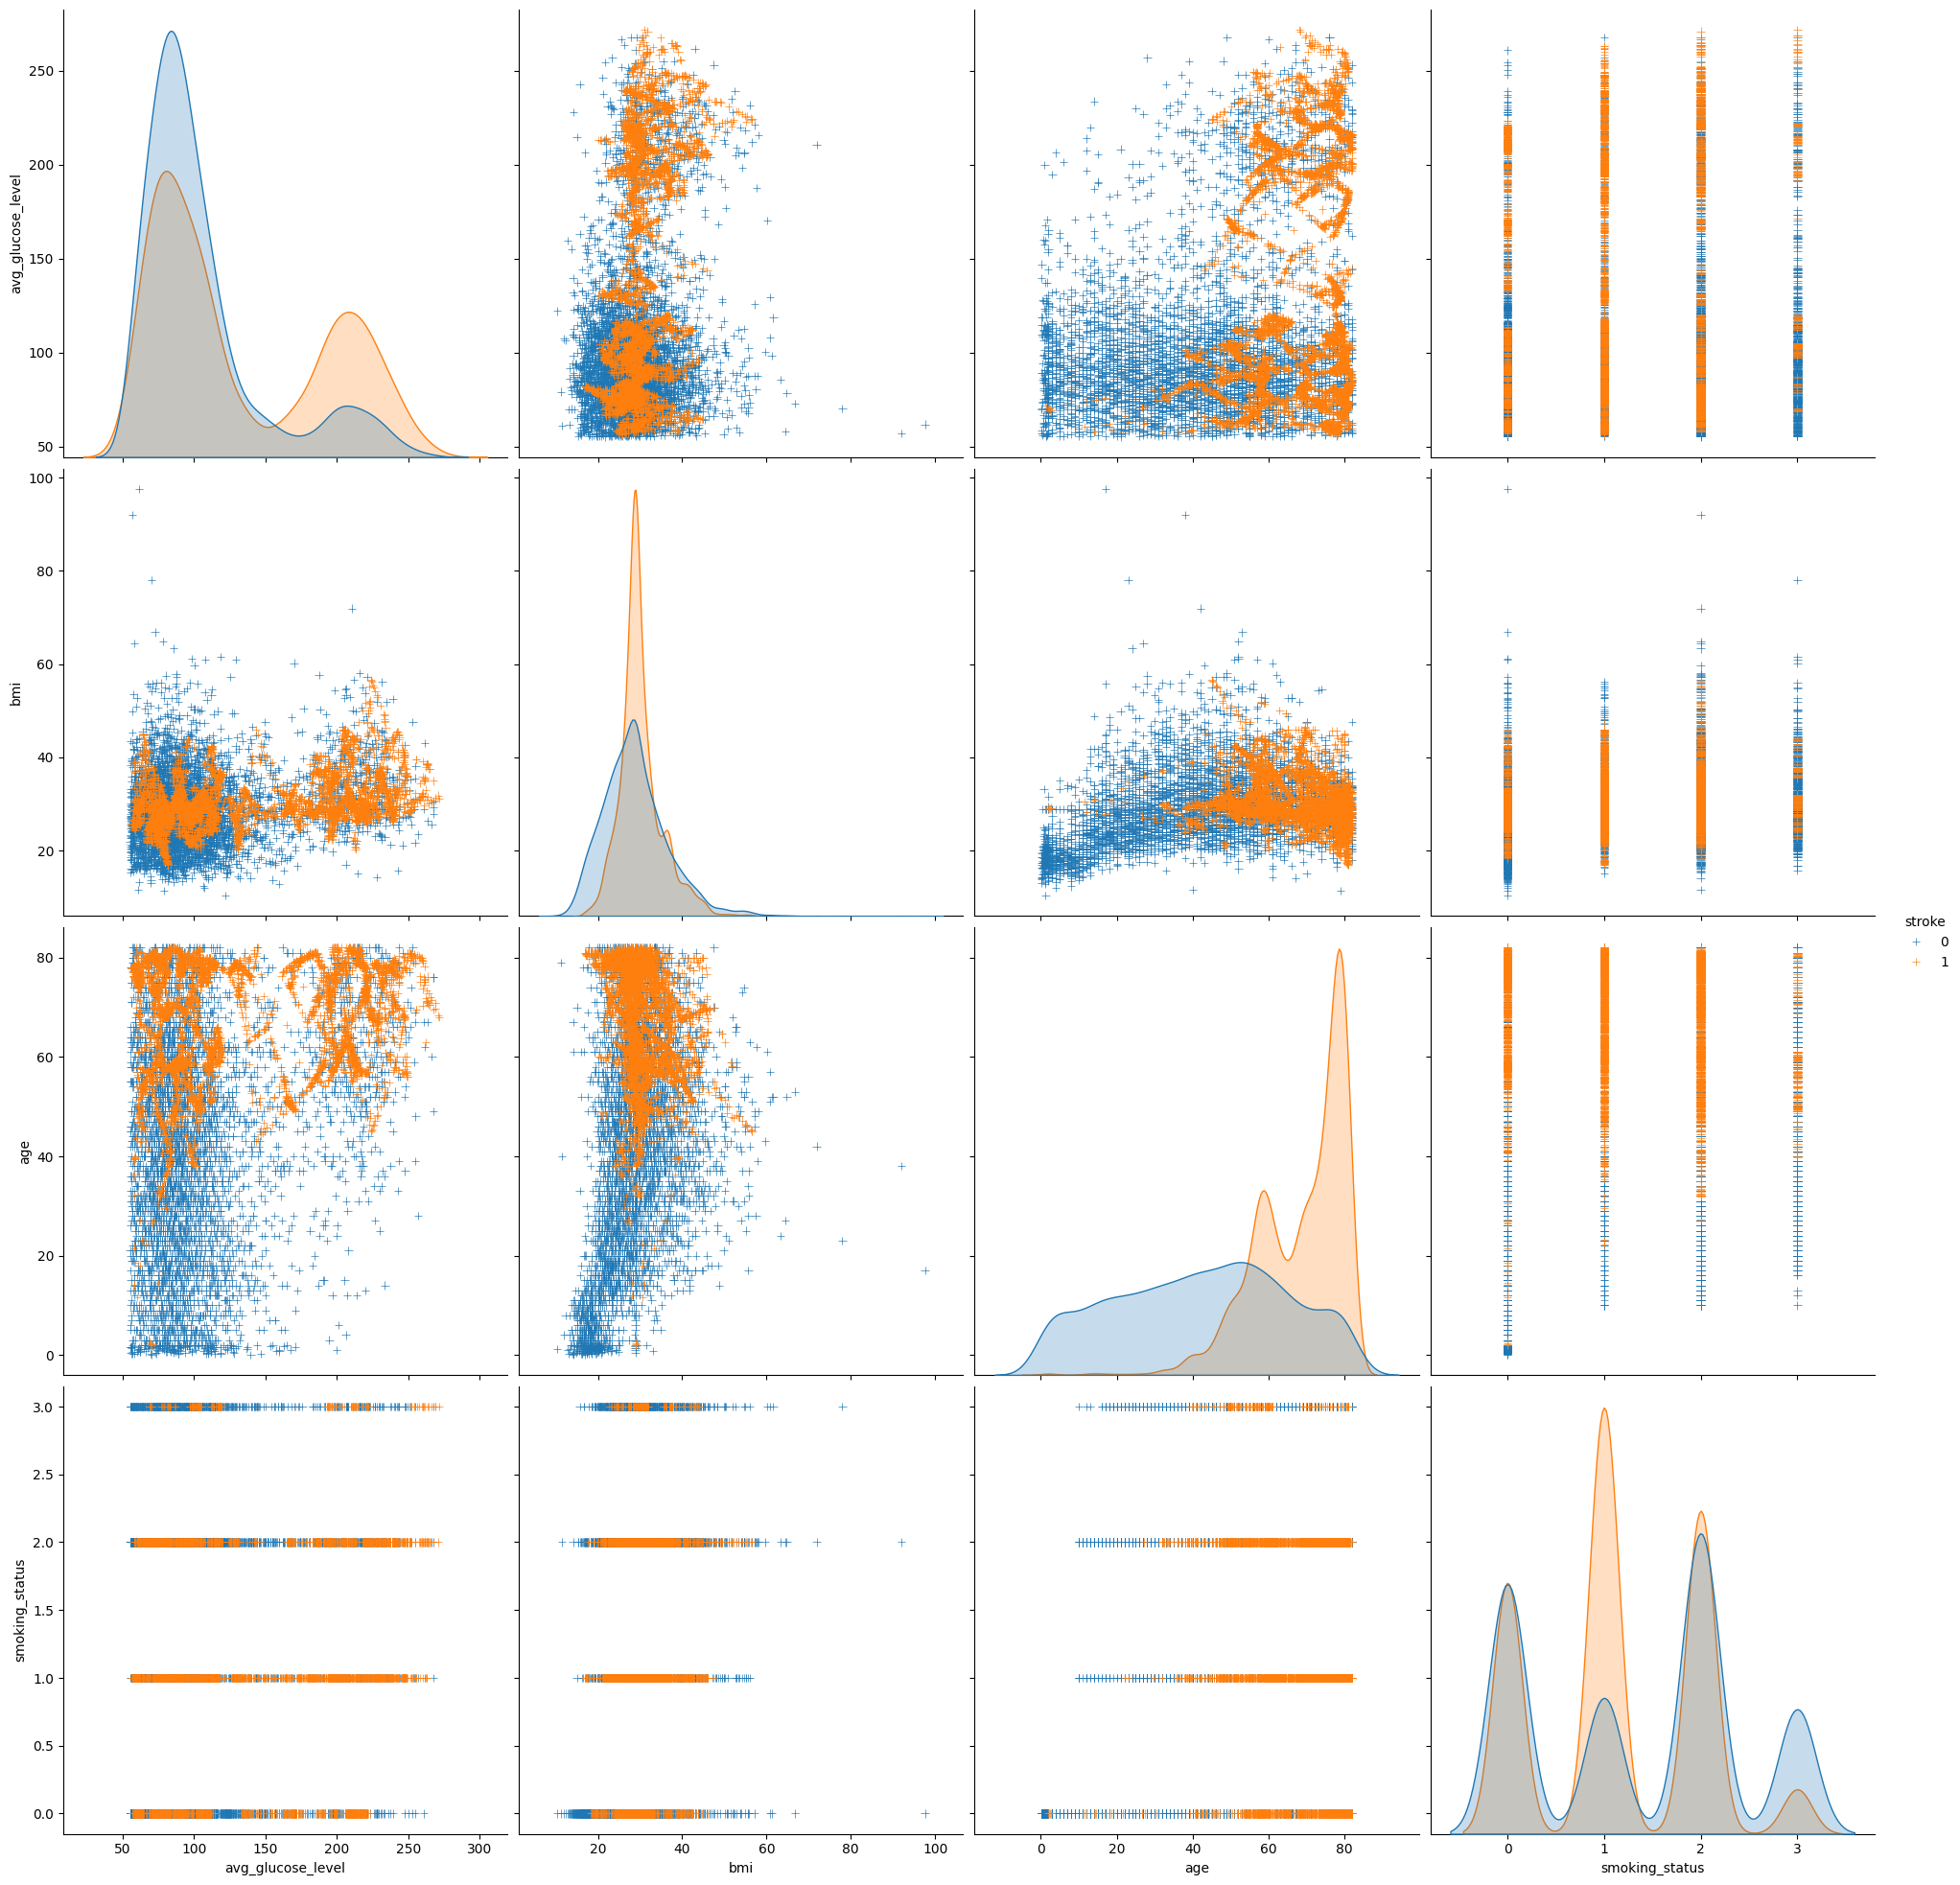

In [12]:
#Визуализация данных
#Парный график для нескольких измерений
sns.pairplot(data_balanced[['avg_glucose_level' ,'bmi', 'age', 'smoking_status','stroke']], hue='stroke', height=5, markers='+')
plt.show()

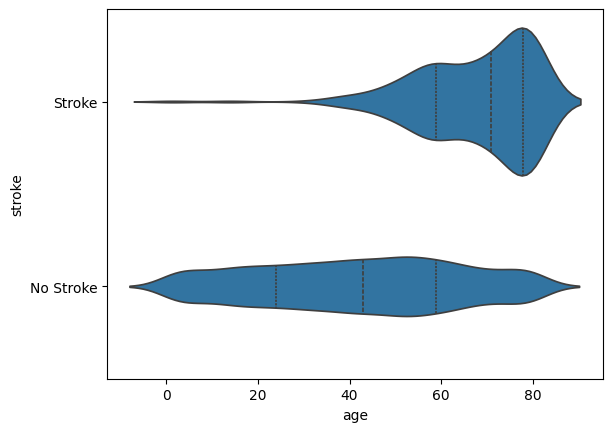

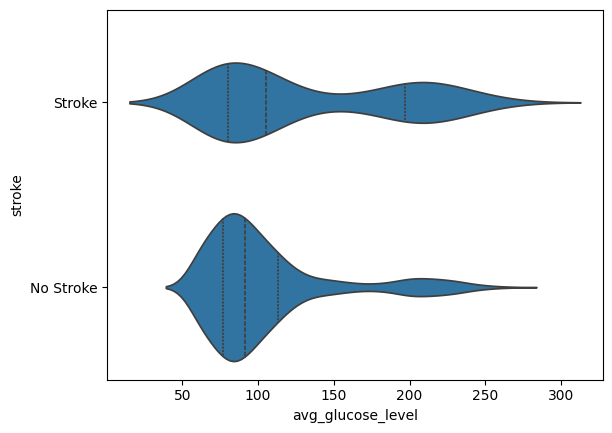

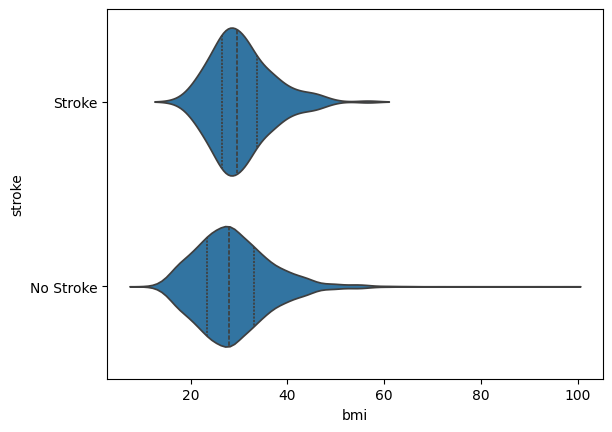

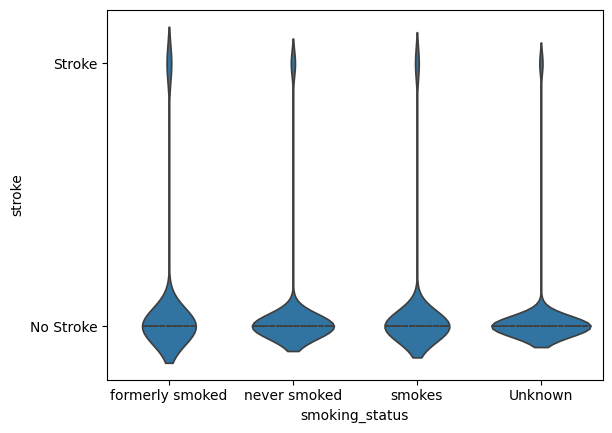

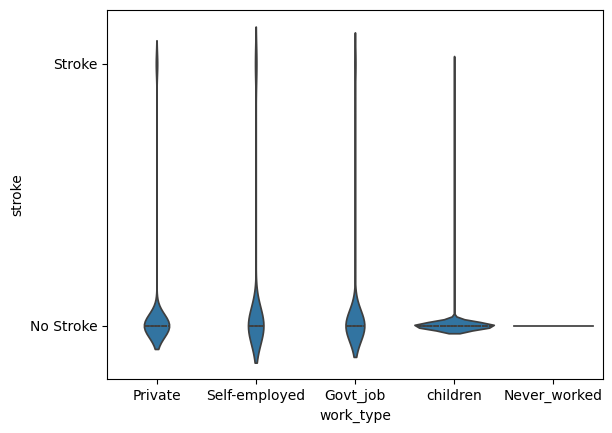

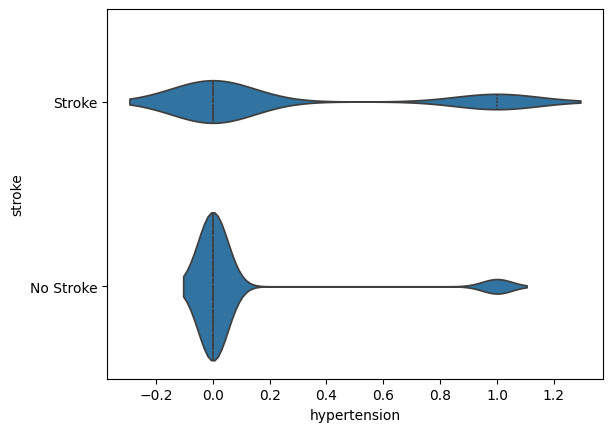

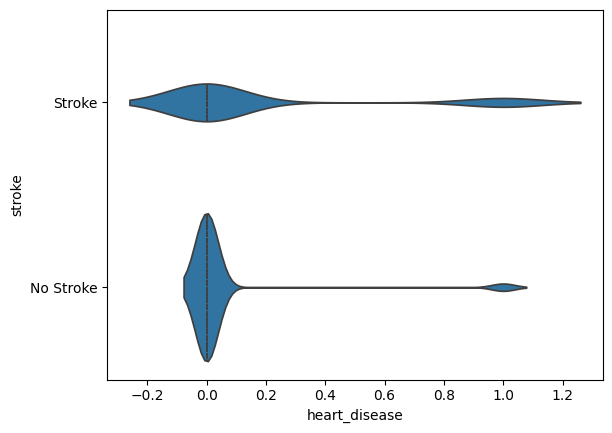

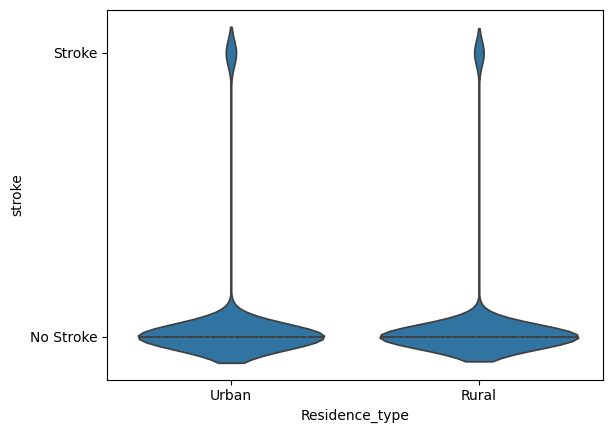

In [13]:
#Скрипичный график.
#Используется для проверки сравнения распределения переменных:
data_copy['stroke'].replace([1, 0], ['Stroke', 'No Stroke'], inplace=True)

sns.violinplot(y='stroke', x='age', data=data_copy, inner='quartile') #.set_title('y - 1, если у пациента был инсульт, или 0, если нет', '\nx-возраст')
plt.show()
sns.violinplot(y='stroke', x='avg_glucose_level', data=data_copy, inner='quartile') #.set_title('y - 1, если у пациента был инсульт, или 0, если нет', '\nx-всредний уровень глюкозы в крови')
plt.show()
sns.violinplot(y='stroke', x='bmi', data=data_copy, inner='quartile') #.set_title('y - 1, если у пациента был инсульт, или 0, если нет', '\nx-индекс массы тела')
plt.show()
sns.violinplot(y='stroke', x='smoking_status', data=data_copy, inner='quartile') #.set_title('y - 1, если у пациента был инсульт, или 0, если нет', '\nx-статус курильщика: "ранее курил - 1", "никогда не курил - 2", "курит - 3" или "Неизвестно - 0"')
plt.show()
sns.violinplot(y='stroke', x='work_type', data=data_copy, inner='quartile') #.set_title('y - 1, если у пациента был инсульт, или 0, если нет', '\nx-тип работы"')
plt.show()
sns.violinplot(y='stroke', x='hypertension', data=data_copy, inner='quartile') #.set_title('y - 1, если у пациента был инсульт, или 0, если нет', '\nx-артериальная гипертензия: 0, если у пациента нет артериальной гипертензии, 1, если у пациента есть артериальная гипертензия')
plt.show()
sns.violinplot(y='stroke', x='heart_disease', data=data_copy, inner='quartile') #.set_title('y - 1, если у пациента был инсульт, или 0, если нет', '\nx-сердечная недостаточность: 0, если у пациента нет сердечных заболеваний, 1, если у пациента есть сердечные заболевания')
plt.show()
sns.violinplot(y='stroke', x='Residence_type', data=data_copy, inner='quartile') #.set_title('y - 1, если у пациента был инсульт, или 0, если нет', '\nx-тип проживания')
plt.show()
#...




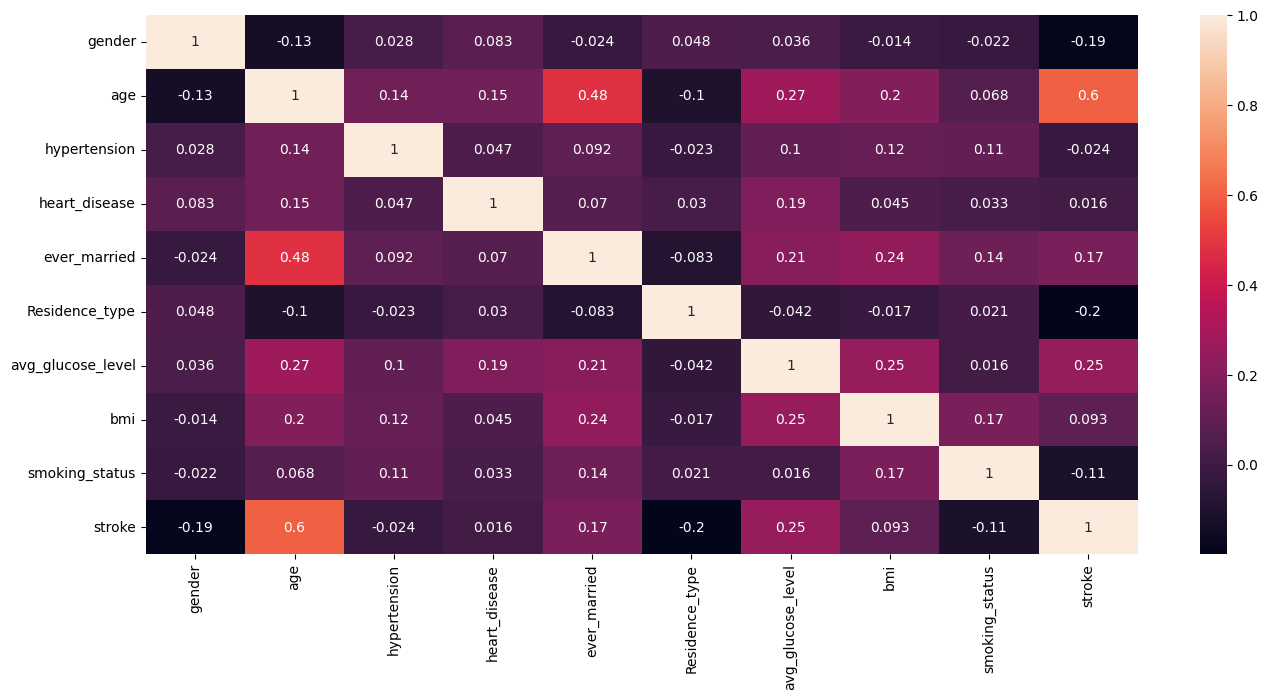

In [14]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.
plt.figure(figsize=(16,7))
sns.heatmap(data_balanced.corr(numeric_only = True), annot=True)
plt.show()

In [15]:
#Построение модели
X = data_balanced.drop(['stroke'], axis=1)
y = data_balanced['stroke']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (9722, 9) | y shape: (9722,) 


In [16]:
#Train Test разделение
#Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(),
#мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных

import scipy.stats as stats
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


TtestResult(statistic=-56.93563617512907, pvalue=0.0, df=9720.0)

In [17]:
#Обучение и выбор оптимальной модели
'''
Далее попробуем следующие алгоритмы:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN)
Classification and Regression Trees (CART)
Gaussian Naive Bayes (NB)
Support Vector Machines (SVM)
'''

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))



LR: 0.803014 (0.014854)
LDA: 0.804043 (0.018384)
KNN: 0.886460 (0.010973)
CART: 0.893532 (0.006989)
NB: 0.764950 (0.020823)
SVC: 0.937508 (0.006631)


In [18]:
#Обучение конкретной модели
#Алгоритм SVC получил лучшую метрику

from sklearn.model_selection import GridSearchCV


svc = SVC()
#Выбираем лучший параметр kernel (ядро)
grid_param = {'kernel':['linear','poly','rbf','sigmoid']}
grid_model = GridSearchCV(estimator = svc, param_grid = grid_param, scoring = 'accuracy', cv = 5, verbose = 1)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_, end="\n\n")

#Выбираем лучший параметр С
svc = SVC(kernel='rbf')
grid_param = {'C':range(1,30)}
grid_model = GridSearchCV(estimator = svc, param_grid = grid_param, scoring = 'accuracy', cv = 5, verbose = 1)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_, end="\n\n")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'kernel': 'linear'}

Fitting 5 folds for each of 29 candidates, totalling 145 fits
{'C': 29}



In [19]:
svc = SVC(kernel='linear', C = 29)
svc.fit(X_train, y_train)
r = svc.predict(X_test)
accuracy = accuracy_score(y_test, r)
print(r, accuracy)

[1 1 0 ... 1 1 1] 0.7825192802056555


In [34]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
recall = metrics.recall_score(y_test, r, average="weighted")
precision = metrics.precision_score(y_test, r, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))

Recall (all 1s predicted right): 0.78
Precision (confidence when predicting a 1): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'SVC surface with original features'}>

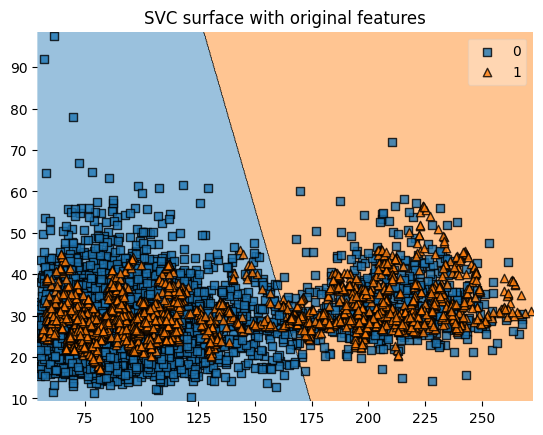

In [20]:
#Визуализация решения
from mlxtend.plotting import plot_decision_regions

#['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
X_2d= X_train[['avg_glucose_level', 'bmi']].values
y_s = y_train
y_2d = y_s.values

svc = SVC(kernel='linear', C = 29)
svc.fit(X_2d, y_2d)

plt.title('SVC surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=svc)